In [24]:
import numpy as np
import pandas as pd
import urllib.request
import re

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from statsmodels.api import OLS, add_constant

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [220]:
## Catboost
!pip3 install catboost

# EDA

In [55]:
train_df = pd.read_csv('train_df_v2.csv')
test_df = pd.read_csv('test_df_v2.csv')

<AxesSubplot:>

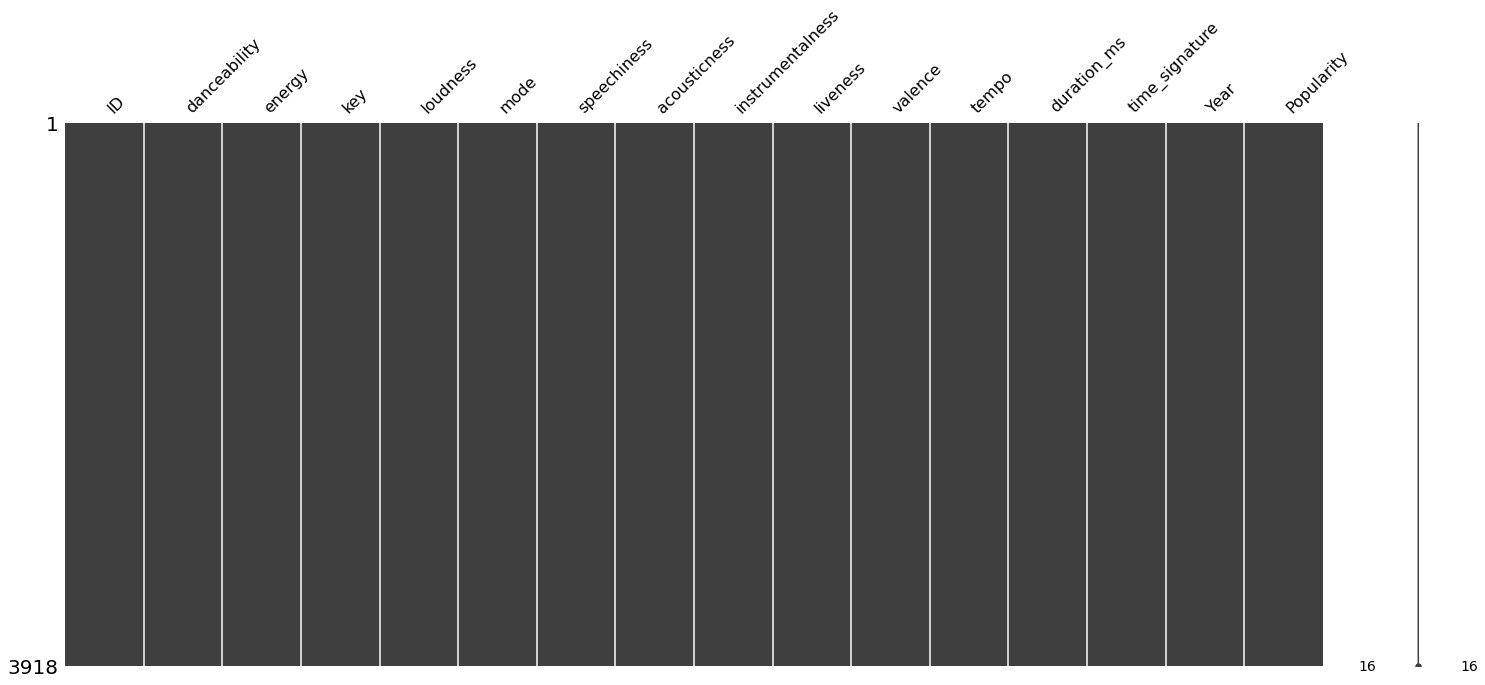

In [9]:
import missingno as msno

msno.matrix(test_df)

In [29]:
# Getting the different values for each column
train_df.nunique()

ID                  15671
danceability          811
energy                834
key                    12
loudness             8184
mode                    2
speechiness          1309
acousticness         3814
instrumentalness     3512
liveness             1492
valence              1541
tempo                8786
duration_ms         12983
time_signature          4
Year                   44
Popularity             89
dtype: int64

In [31]:
col_quali = ['time_signature', 'mode', 'key', ]
col_quali

['time_signature', 'mode', 'key']

C:\Users\wabec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wabec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wabec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


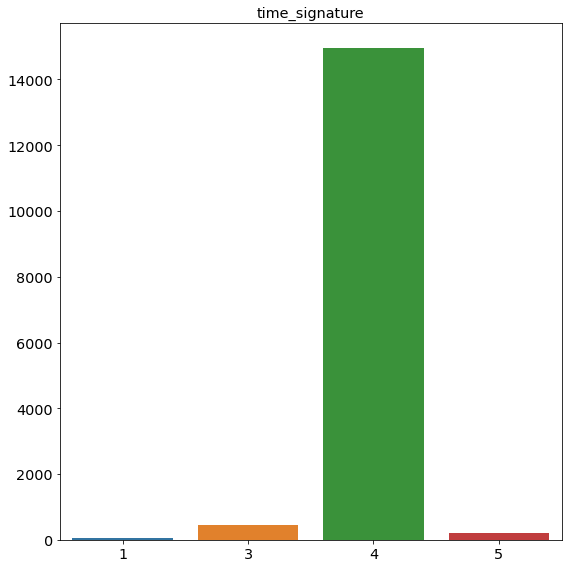

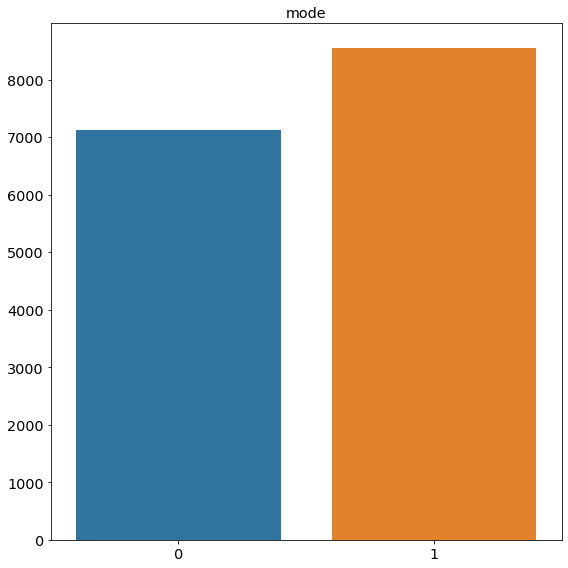

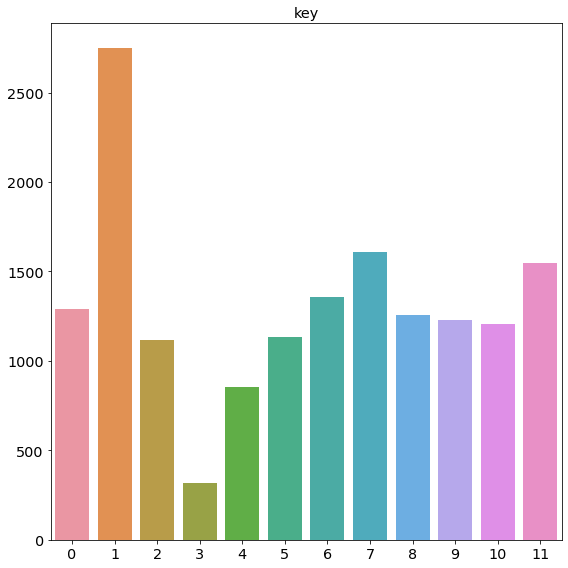

In [28]:
# Generating plots for 
for col in col_quali:
    plt.figure(figsize=(8,8))
    sns.barplot(train_df[col].value_counts().index, train_df[col].value_counts().values)
    params = {'legend.fontsize': 'x-large',
              'figure.figsize': (8, 8),
             'axes.labelsize': 'x-large',
             'axes.titlesize':'x-large',
             'xtick.labelsize':'x-large',
             'ytick.labelsize':'x-large'}
    pylab.rcParams.update(params)
    plt.title(col)
    plt.tight_layout()

C:\Users\wabec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wabec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wabec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


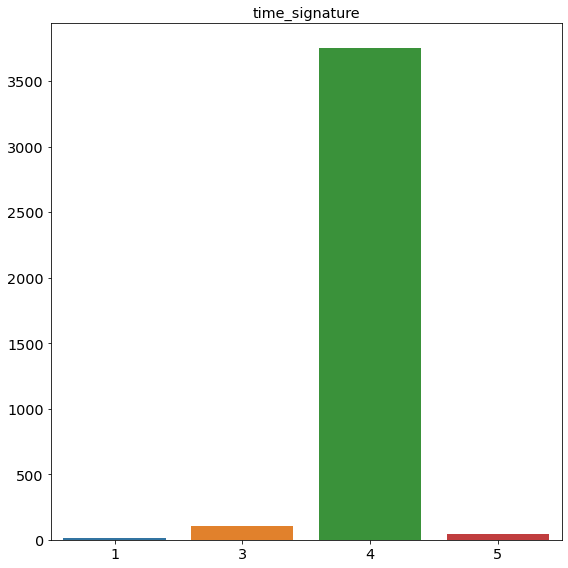

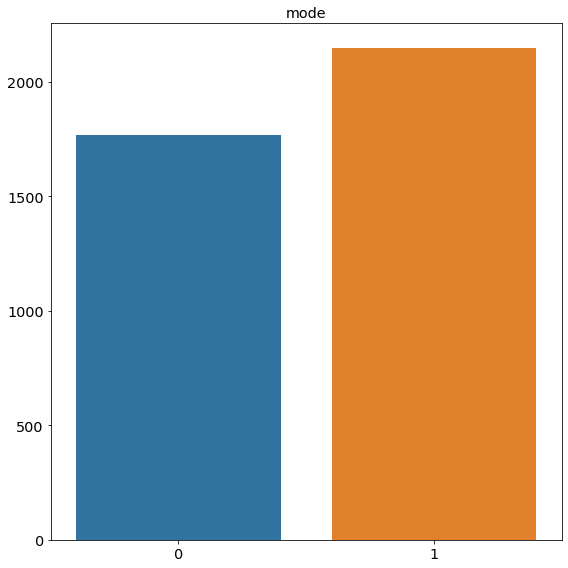

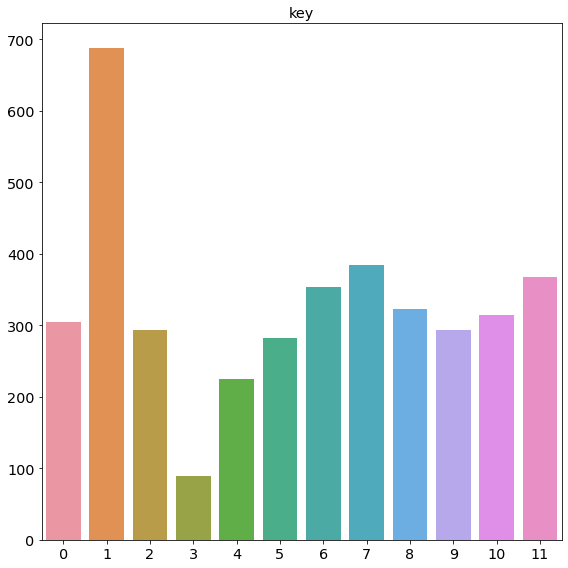

In [30]:
# Generando graficos de conteo de categorias para variables cualitativas
for col in col_quali:
    plt.figure(figsize=(8,8))
    sns.barplot(test_df[col].value_counts().index, test_df[col].value_counts().values)
    params = {'legend.fontsize': 'x-large',
              'figure.figsize': (8, 8),
             'axes.labelsize': 'x-large',
             'axes.titlesize':'x-large',
             'xtick.labelsize':'x-large',
             'ytick.labelsize':'x-large'}
    pylab.rcParams.update(params)
    plt.title(col)
    plt.tight_layout()

In [33]:
col_quanti = ['danceability', 'energy','loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'Year']

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

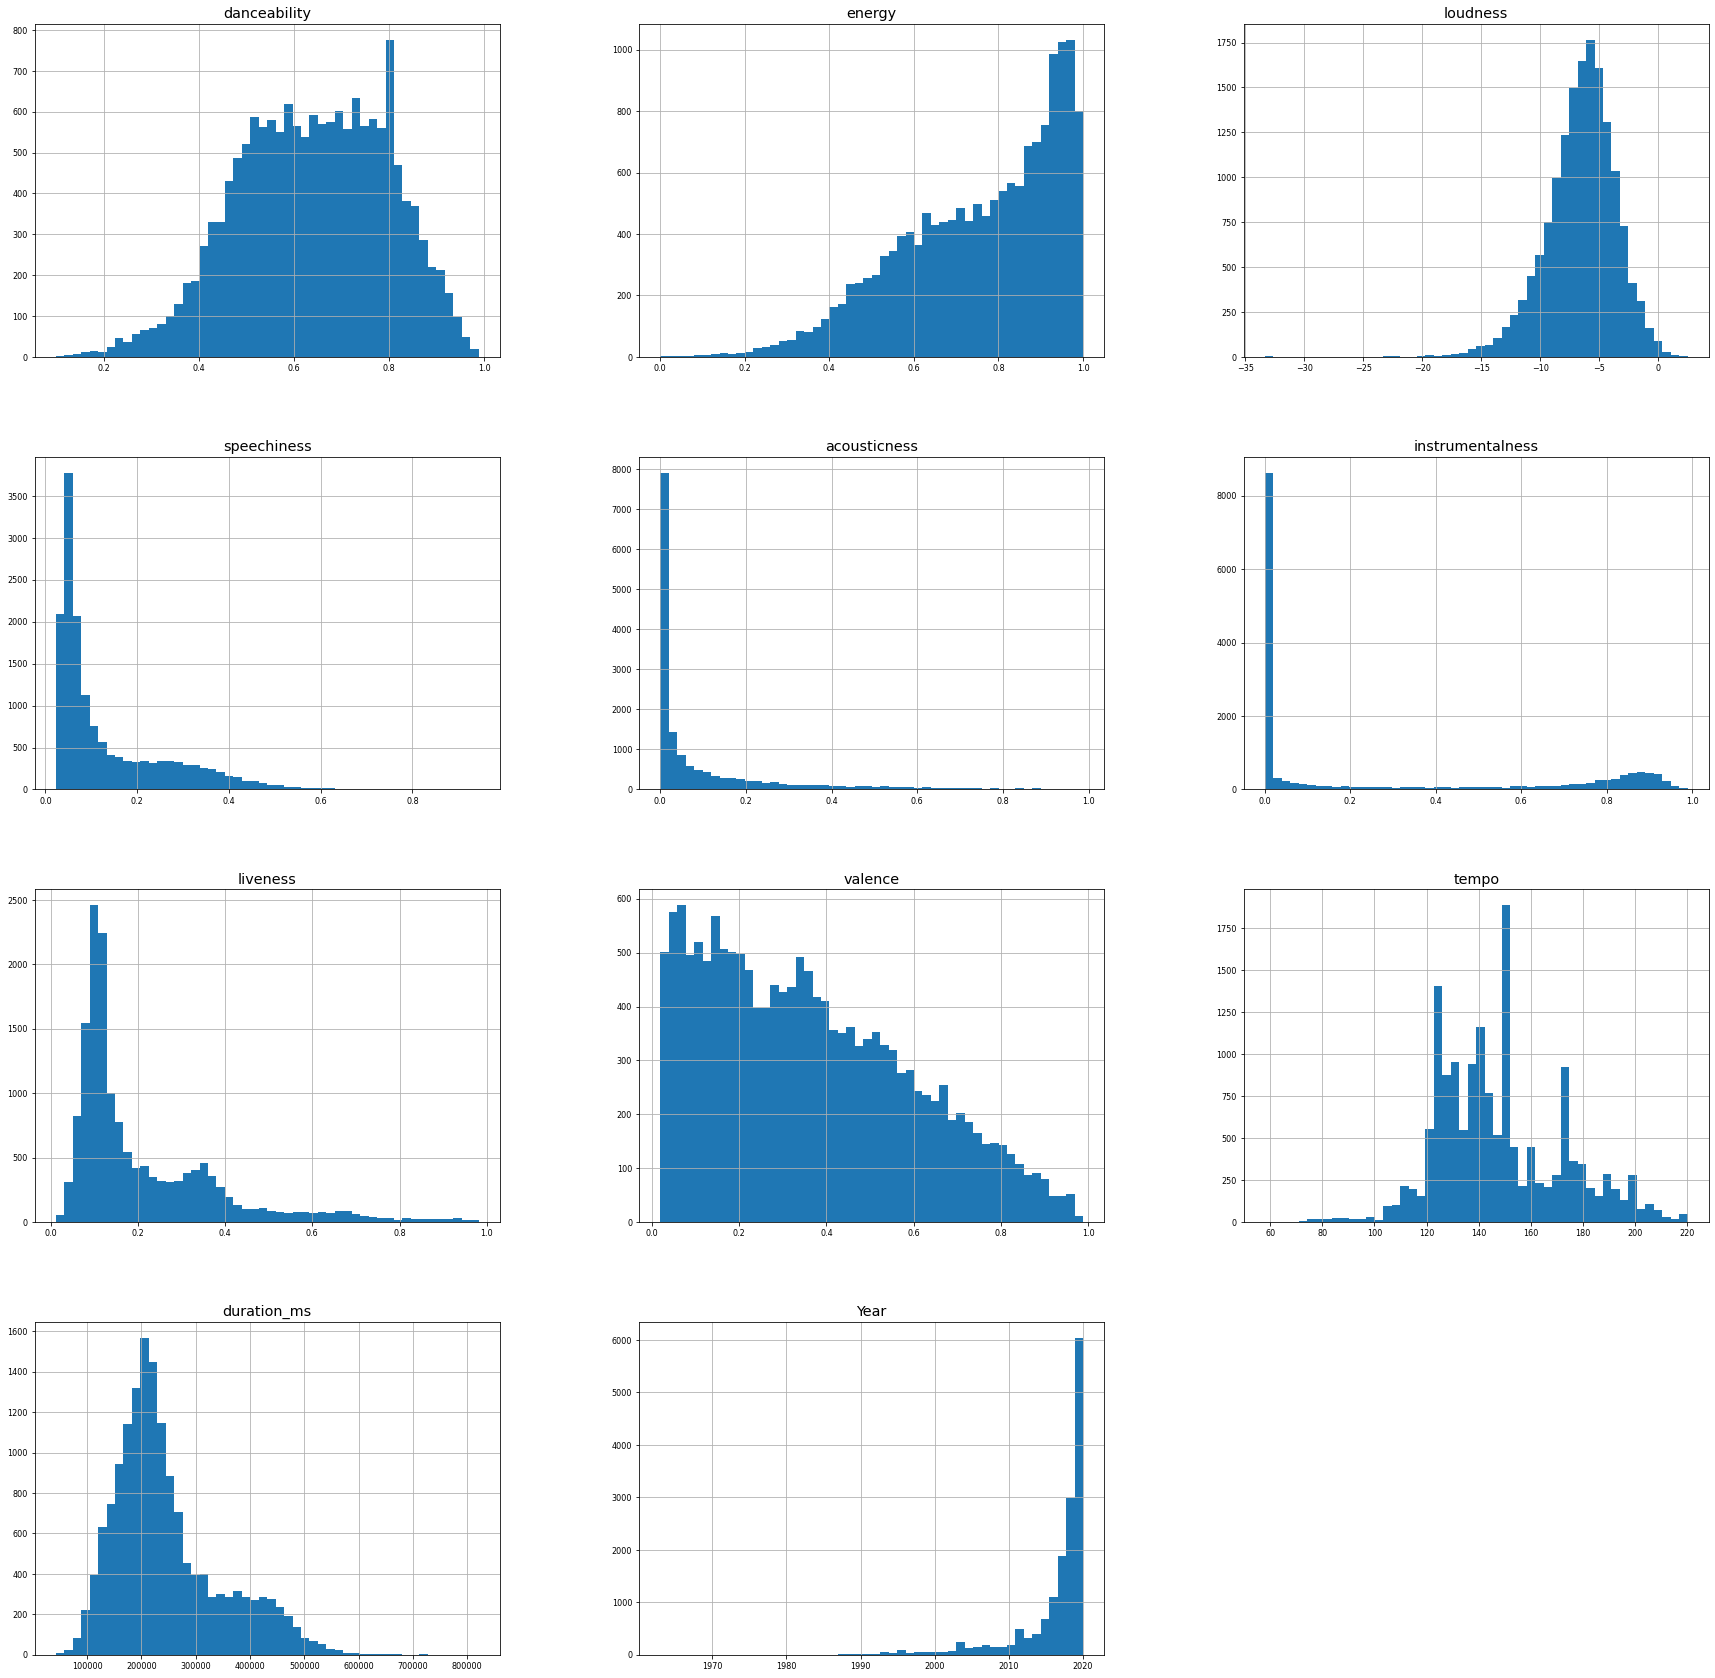

In [35]:
train_df[col_quanti].hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8)

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

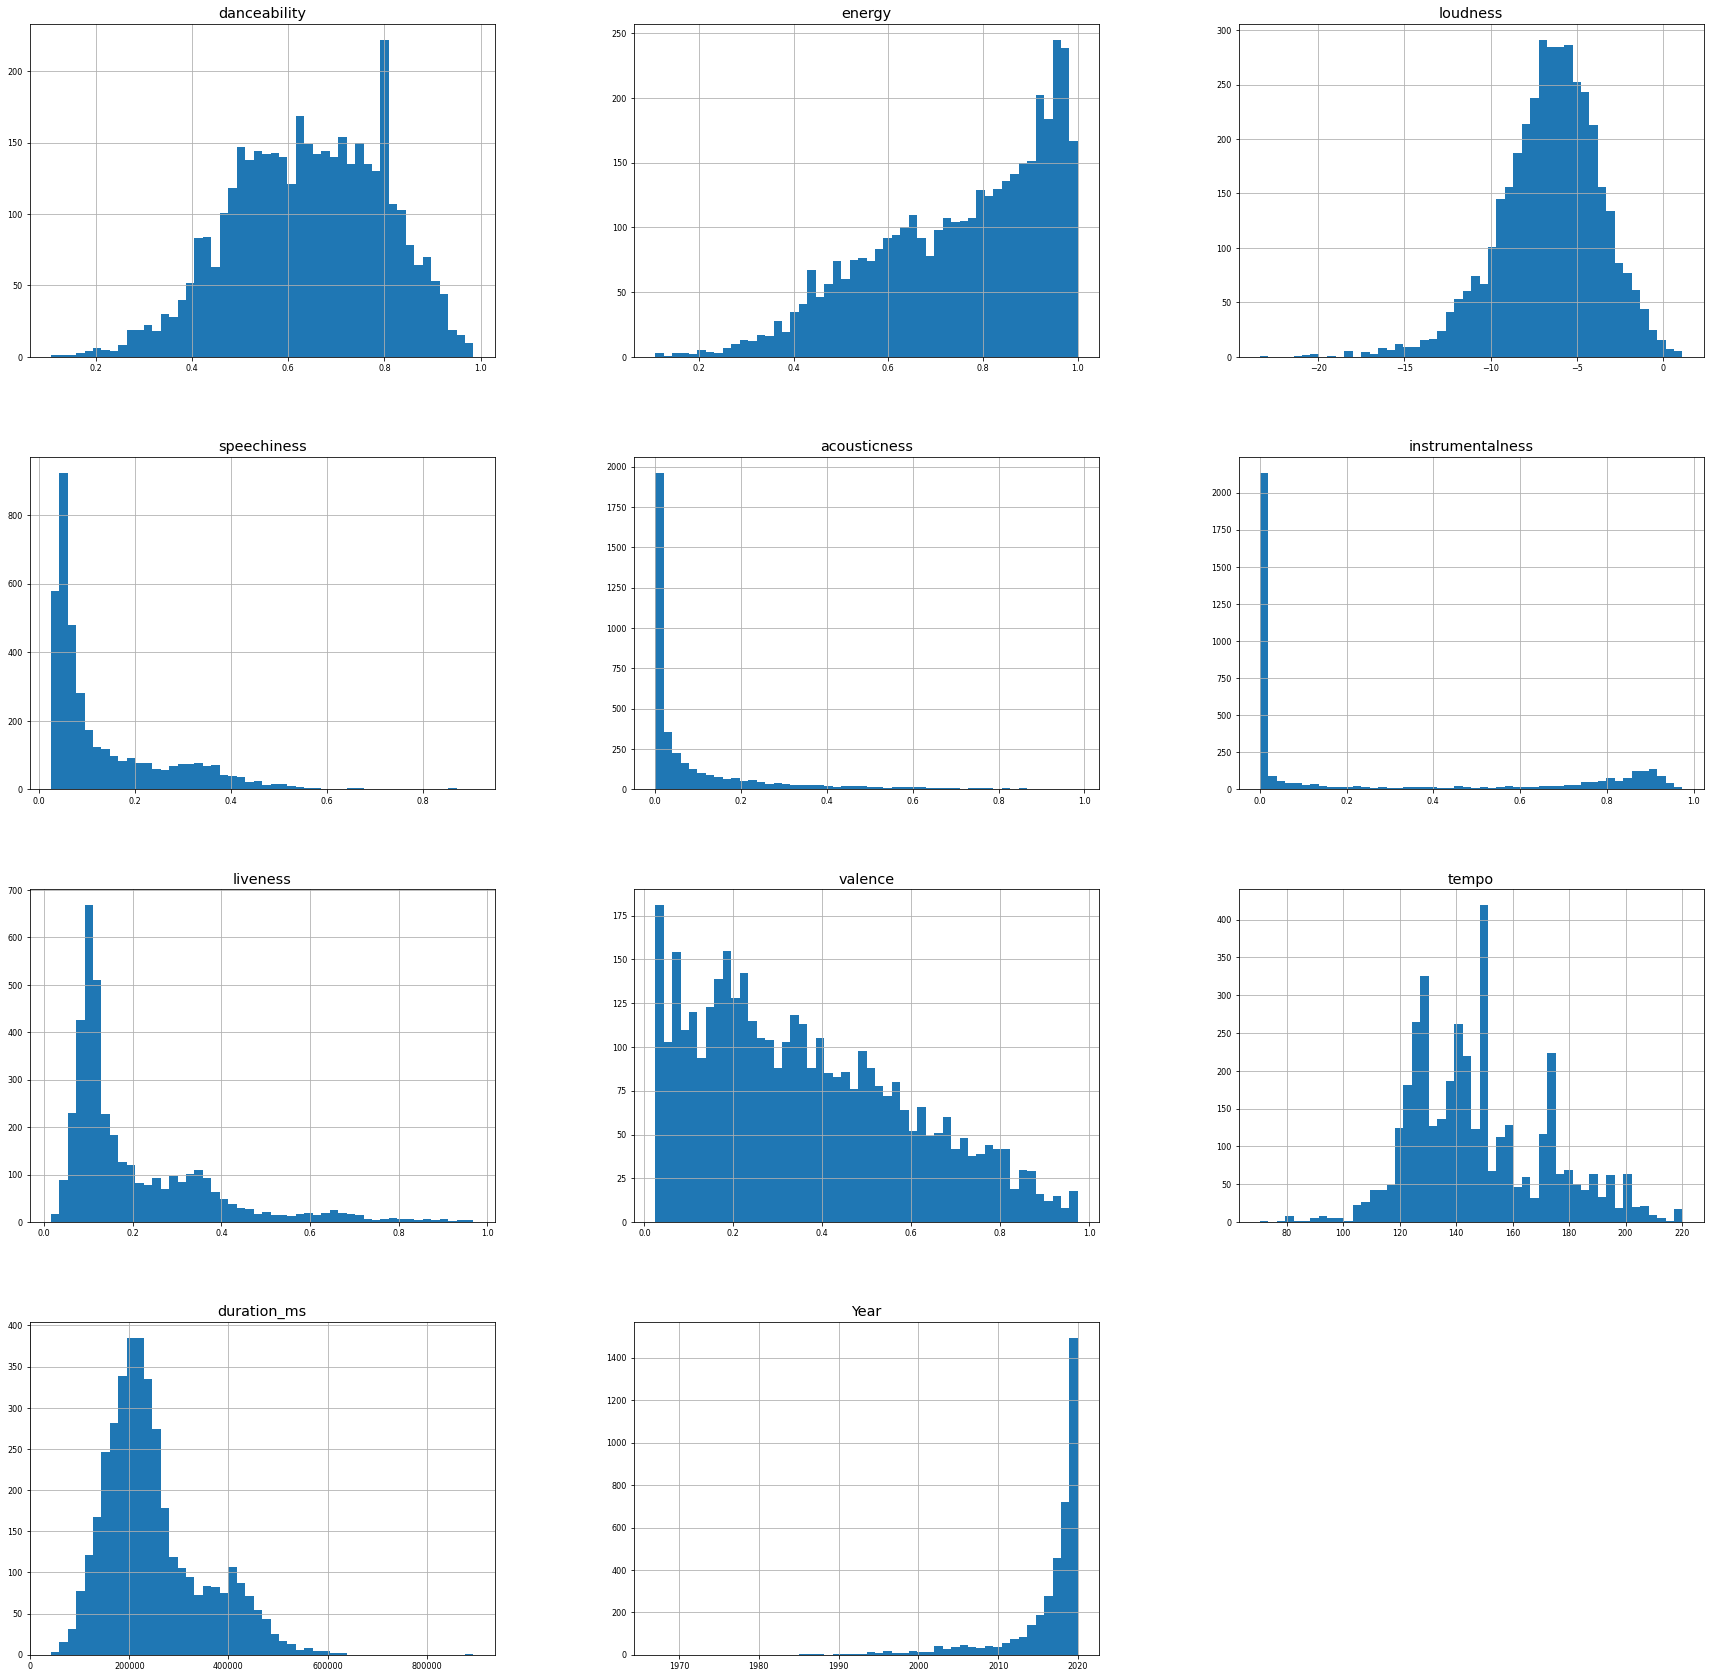

In [36]:
test_df[col_quanti].hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8)

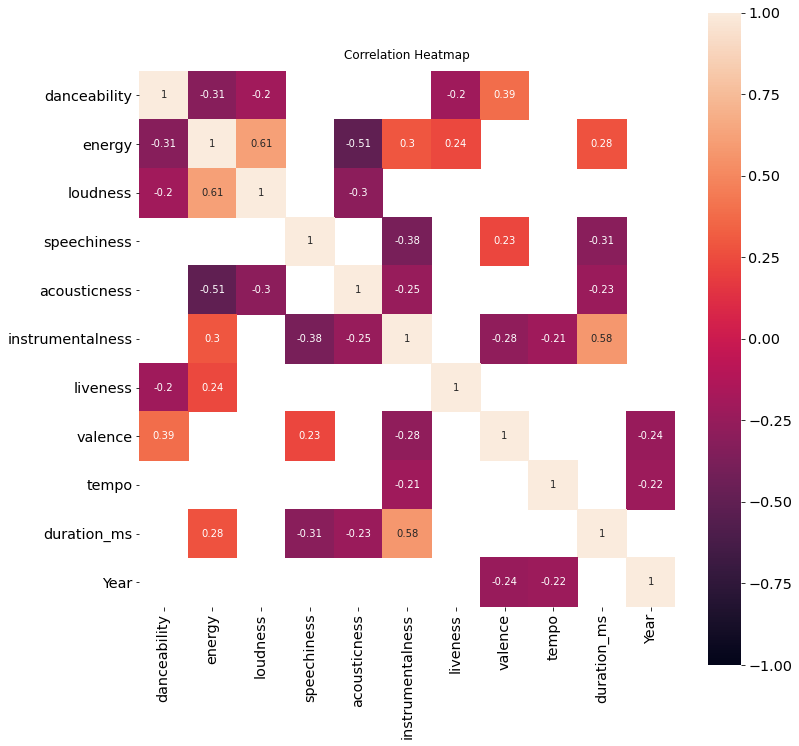

In [47]:
# Increase the size of the heatmap.
plt.figure(figsize=(12, 12))
corr = train_df[col_quanti].corr()

# Set the range of values
heatmap = sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)], vmin=-1, vmax=1, annot=True, square=True)
# Give a title to the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

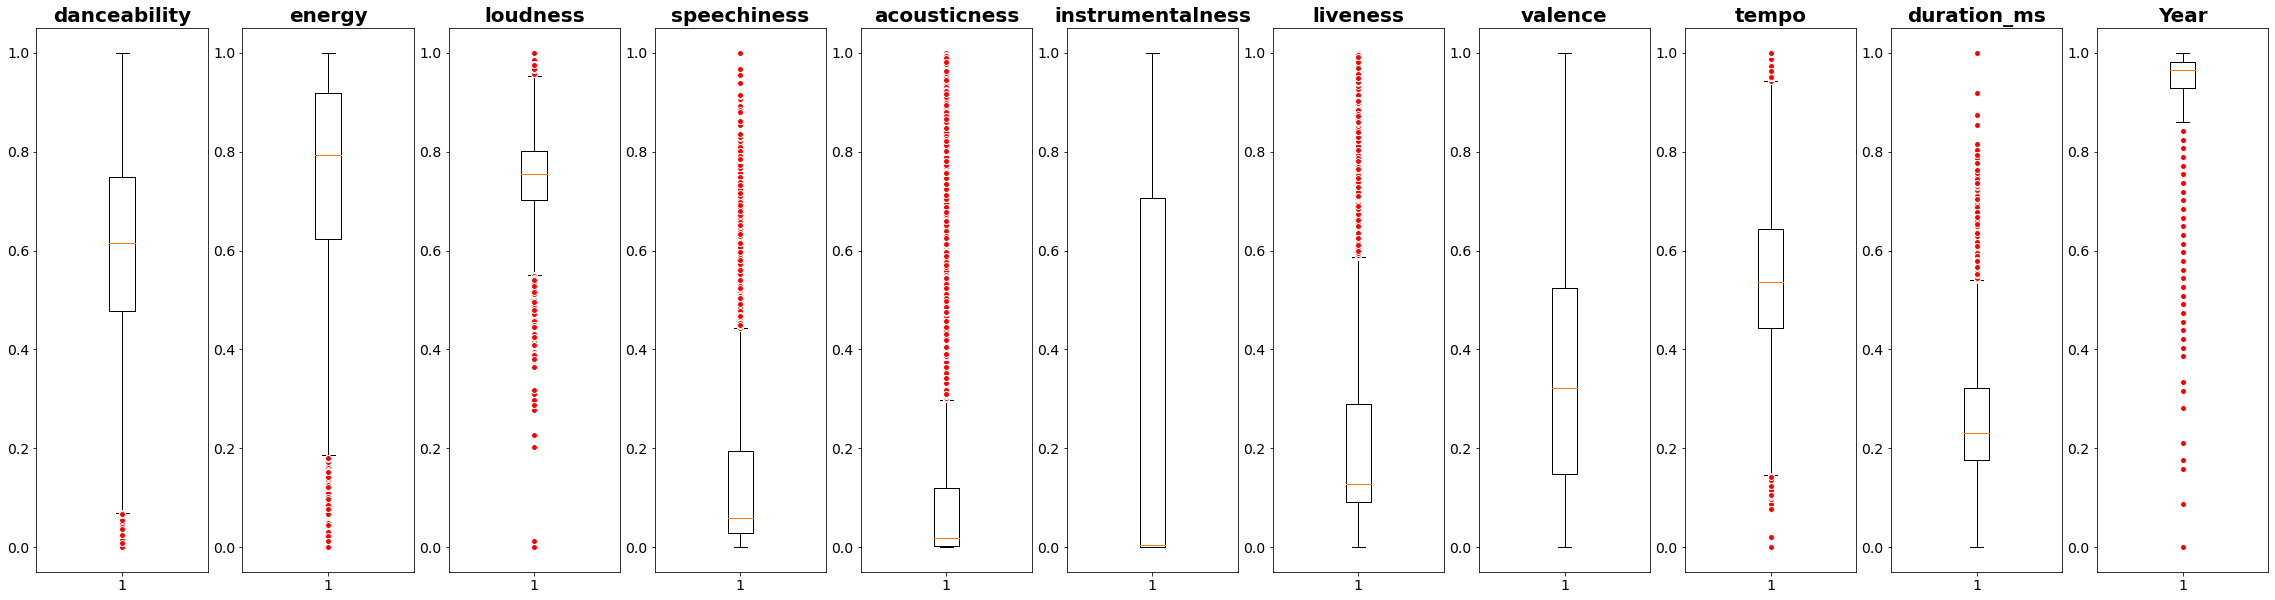

In [48]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(train_df[col_quanti].columns), figsize=(40,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(train_df[col_quanti].iloc[:,i], flierprops=red_circle)
    ax.set_title(train_df[col_quanti].columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

(array([2143., 1265., 1341., 1045., 1002., 1092.,  818., 1003.,  766.,
         784.,  888.,  657.,  721.,  554.,  475.,  485.,  284.,  251.,
          79.,   18.]),
 array([ 1. ,  5.4,  9.8, 14.2, 18.6, 23. , 27.4, 31.8, 36.2, 40.6, 45. ,
        49.4, 53.8, 58.2, 62.6, 67. , 71.4, 75.8, 80.2, 84.6, 89. ]),
 <BarContainer object of 20 artists>)

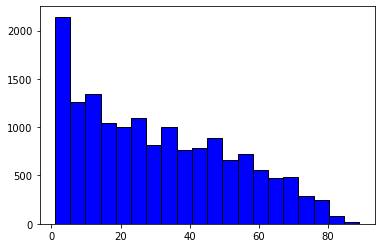

In [196]:
import matplotlib.pyplot as plt

n_bins = 20

plt.hist(train_df['Popularity'], color = 'blue', edgecolor = 'black', bins = n_bins)

# Linear Regression + Lasso

In [51]:
train_df.head(10)

,ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Year,Popularity
0,4hH69Z2SGvKr702d2guLIt,0.609,0.753,6,-5.390,0,0.3800,0.11000,0.000000,0.1400,0.8220,186.610,206889,4,2016,41.0
1,624i4hnLpZlRRKyZgFcMb5,0.435,0.966,5,-0.748,1,0.1020,0.00254,0.678000,0.6970,0.0712,171.900,228859,4,2019,22.0
2,3UbeHBs0iikFjpZNiFvTom,0.355,0.823,2,-9.479,0,0.0581,0.05110,0.871000,0.1200,0.0797,136.005,298647,4,2018,18.0
3,7E6e5lZPJ5BgahnsJanAsP,0.575,0.589,7,-4.943,1,0.0601,0.13600,0.000000,0.0903,0.3760,173.962,236600,4,2001,48.0
4,7GNm0ZYsg5lDiWcvltZZsT,0.569,0.984,6,-1.820,1,0.4030,0.00262,0.000337,0.6390,0.4030,171.983,238605,4,2019,37.0
5,5FkThlcdNj73ES7OT15C86,0.520,0.909,10,-7.636,0,0.2540,0.00400,0.005560,0.3170,0.2340,132.953,390227,4,2010,15.0
6,7JAzcUsBRYEIEJTqaV4WGF,0.354,0.982,10,-1.692,1,0.1010,0.04030,0.000013,0.1570,0.0698,151.984,233684,4,2018,18.0
7,379iLUtbe9RsHHxq5EXgQW,0.506,0.919,4,-7.162,0,0.0406,0.01160,0.721000,0.2850,0.2670,140.037,212611,4,2020,3.0
8,0qJeyYAgv6UpvewUxRXAhb,0.874,0.443,5,-9.628,0,0.2410,0.14700,0.000000,0.1240,0.2980,118.004,235988,4,2020,35.0
9,3SL3GG9Bs7m1s9aqhjCeIa,0.884,0.807,9,-6.781,0,0.3100,0.06070,0.003010,0.0949,0.3570,185.944,282667,4,1995,52.0


In [56]:
train_df.shape

(15671, 16)

In [57]:
test_df.shape

(3918, 16)

In [46]:
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
cols = [c for c in train_df.columns if c not in ['Popularity', 'ID'] ]
target = "Popularity"
train_df[cols] = scaler.fit_transform(train_df[cols])

In [121]:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, scoring='r2', cv=10)
print(np.mean(scores), np.std(scores))

0.3597685064888291 0.015795493509491075


In [128]:
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_, lm.coef_)

60.120955171486024 [ 7.96075090e+00 -3.51192569e+01  5.68615426e-01  4.78362292e+01
  2.74390067e-01 -4.12006209e+00  1.21146322e+01 -1.60865126e+01
 -4.36454340e+00  9.76089980e+00 -1.61772029e+00 -2.45675172e+00
  1.80310680e-02 -4.44491794e+01]


In [147]:
ols_mod = OLS(y, add_constant(X)).fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     633.0
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:05:03   Log-Likelihood:                -66981.
No. Observations:               15671   AIC:                         1.340e+05
Df Residuals:                   15656   BIC:                         1.341e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.1210      2.806     21.428      0.000      54.621      65.621
x1             7.9608      0.976      8.156      0.000       6.048       9.874
x2           -35.1193      1.259    -27.885      0.000     -37.588     -32.651
x3             0.5686      0.432      1.315      0.189      -0.279       1.416
x4            47.8362      2.465     19.408      0.000      43.005      52.667
x5             0.2744      0.290      0.947      0.343      -0.293       0.842
x6            -4.1201      1.129     -3.651      0.000      -6.332      -1.908
x7            12.1146      0.923     13.130      0.000      10.306      13.923
x8           -16.0865      0.539    -29.827      0.000     -17.144     -15.029
x9            -4.3645      0.819     -5.330      0.000      -5.969      -2.760
x10            9.7609      0.697     14.014      0.000       8.396      11.126
x11           -1.6177      1.005     -1.610      0.107      -3.587       0.352
x12           -2.4568      1.402     -1.752      0.080      -5.206       0.292
x13            0.0180      2.081      0.009      0.993      -4.061       4.097
x14          -44.4492      1.652    -26.902      0.000     -47.688     -41.211
==============================================================================
Omnibus:                       78.840   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.158
Skew:                           0.072   Prob(JB):                     3.18e-14
Kurtosis:                       2.727   Cond. No.                         55.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
pipeline = Pipeline([
                     ('scaler', MinMaxScaler()),
                     ('model', Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1, 10, 0.05)},
                      cv = 5, scoring="r2", verbose=3
                      )

search.fit(X, y)

Fitting 5 folds for each of 198 candidates, totalling 990 fits
[CV 1/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 2/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 1/5] END ...............model__alpha=0.15000000000000002; total time=   0.0s
[CV 2/5] END ...............model__alpha=0.15000000000000002; total time=   0.0s
[CV 3/5] END ...............model__alpha=0.15000000000000002; total time=   0.0s
[CV 4/5] END ...............model__alpha=0.15000000000000002; total time=   0.0s
[CV 5/5] END ...............model__alpha=0.15000000000000002; total time=   0.0s
[CV 1/5] END ...............model__alpha=0.20000000000000004; total time=   0.0s
[CV 2/5] END ...............model__alpha=0.200

[CV 4/5] END ................model__alpha=1.1000000000000005; total time=   0.0s
[CV 5/5] END ................model__alpha=1.1000000000000005; total time=   0.0s
[CV 1/5] END ................model__alpha=1.1500000000000004; total time=   0.0s
[CV 2/5] END ................model__alpha=1.1500000000000004; total time=   0.0s
[CV 3/5] END ................model__alpha=1.1500000000000004; total time=   0.0s
[CV 4/5] END ................model__alpha=1.1500000000000004; total time=   0.0s
[CV 5/5] END ................model__alpha=1.1500000000000004; total time=   0.0s
[CV 1/5] END ................model__alpha=1.2000000000000004; total time=   0.0s
[CV 2/5] END ................model__alpha=1.2000000000000004; total time=   0.0s
[CV 3/5] END ................model__alpha=1.2000000000000004; total time=   0.0s
[CV 4/5] END ................model__alpha=1.2000000000000004; total time=   0.0s
[CV 5/5] END ................model__alpha=1.2000000000000004; total time=   0.0s
[CV 1/5] END ...............

[CV 3/5] END .................model__alpha=2.150000000000001; total time=   0.0s
[CV 4/5] END .................model__alpha=2.150000000000001; total time=   0.0s
[CV 5/5] END .................model__alpha=2.150000000000001; total time=   0.0s
[CV 1/5] END ................model__alpha=2.2000000000000006; total time=   0.0s
[CV 2/5] END ................model__alpha=2.2000000000000006; total time=   0.0s
[CV 3/5] END ................model__alpha=2.2000000000000006; total time=   0.0s
[CV 4/5] END ................model__alpha=2.2000000000000006; total time=   0.0s
[CV 5/5] END ................model__alpha=2.2000000000000006; total time=   0.0s
[CV 1/5] END .................model__alpha=2.250000000000001; total time=   0.0s
[CV 2/5] END .................model__alpha=2.250000000000001; total time=   0.0s
[CV 3/5] END .................model__alpha=2.250000000000001; total time=   0.0s
[CV 4/5] END .................model__alpha=2.250000000000001; total time=   0.0s
[CV 5/5] END ...............

[CV 4/5] END ................model__alpha=3.4000000000000012; total time=   0.0s
[CV 5/5] END ................model__alpha=3.4000000000000012; total time=   0.0s
[CV 1/5] END .................model__alpha=3.450000000000001; total time=   0.0s
[CV 2/5] END .................model__alpha=3.450000000000001; total time=   0.0s
[CV 3/5] END .................model__alpha=3.450000000000001; total time=   0.0s
[CV 4/5] END .................model__alpha=3.450000000000001; total time=   0.0s
[CV 5/5] END .................model__alpha=3.450000000000001; total time=   0.0s
[CV 1/5] END ................model__alpha=3.5000000000000013; total time=   0.0s
[CV 2/5] END ................model__alpha=3.5000000000000013; total time=   0.0s
[CV 3/5] END ................model__alpha=3.5000000000000013; total time=   0.0s
[CV 4/5] END ................model__alpha=3.5000000000000013; total time=   0.0s
[CV 5/5] END ................model__alpha=3.5000000000000013; total time=   0.0s
[CV 1/5] END ...............

[CV 4/5] END .................model__alpha=4.450000000000001; total time=   0.0s
[CV 5/5] END .................model__alpha=4.450000000000001; total time=   0.0s
[CV 1/5] END .................model__alpha=4.500000000000001; total time=   0.0s
[CV 2/5] END .................model__alpha=4.500000000000001; total time=   0.0s
[CV 3/5] END .................model__alpha=4.500000000000001; total time=   0.0s
[CV 4/5] END .................model__alpha=4.500000000000001; total time=   0.0s
[CV 5/5] END .................model__alpha=4.500000000000001; total time=   0.0s
[CV 1/5] END .................model__alpha=4.550000000000001; total time=   0.0s
[CV 2/5] END .................model__alpha=4.550000000000001; total time=   0.0s
[CV 3/5] END .................model__alpha=4.550000000000001; total time=   0.0s
[CV 4/5] END .................model__alpha=4.550000000000001; total time=   0.0s
[CV 5/5] END .................model__alpha=4.550000000000001; total time=   0.0s
[CV 1/5] END ...............

[CV 1/5] END .................model__alpha=5.500000000000002; total time=   0.0s
[CV 2/5] END .................model__alpha=5.500000000000002; total time=   0.0s
[CV 3/5] END .................model__alpha=5.500000000000002; total time=   0.0s
[CV 4/5] END .................model__alpha=5.500000000000002; total time=   0.0s
[CV 5/5] END .................model__alpha=5.500000000000002; total time=   0.0s
[CV 1/5] END .................model__alpha=5.550000000000002; total time=   0.0s
[CV 2/5] END .................model__alpha=5.550000000000002; total time=   0.0s
[CV 3/5] END .................model__alpha=5.550000000000002; total time=   0.0s
[CV 4/5] END .................model__alpha=5.550000000000002; total time=   0.0s
[CV 5/5] END .................model__alpha=5.550000000000002; total time=   0.0s
[CV 1/5] END .................model__alpha=5.600000000000001; total time=   0.0s
[CV 2/5] END .................model__alpha=5.600000000000001; total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END .................model__alpha=6.550000000000002; total time=   0.0s
[CV 2/5] END .................model__alpha=6.550000000000002; total time=   0.0s
[CV 3/5] END .................model__alpha=6.550000000000002; total time=   0.0s
[CV 4/5] END .................model__alpha=6.550000000000002; total time=   0.0s
[CV 5/5] END .................model__alpha=6.550000000000002; total time=   0.0s
[CV 1/5] END .................model__alpha=6.600000000000001; total time=   0.0s
[CV 2/5] END .................model__alpha=6.600000000000001; total time=   0.0s
[CV 3/5] END .................model__alpha=6.600000000000001; total time=   0.0s
[CV 4/5] END .................model__alpha=6.600000000000001; total time=   0.0s
[CV 5/5] END .................model__alpha=6.600000000000001; total time=   0.0s
[CV 1/5] END .................model__alpha=6.650000000000002; total time=   0.0s
[CV 2/5] END .................model__alpha=6.650000000000002; total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END .................model__alpha=7.900000000000002; total time=   0.0s
[CV 2/5] END .................model__alpha=7.900000000000002; total time=   0.0s
[CV 3/5] END .................model__alpha=7.900000000000002; total time=   0.0s
[CV 4/5] END .................model__alpha=7.900000000000002; total time=   0.0s
[CV 5/5] END .................model__alpha=7.900000000000002; total time=   0.0s
[CV 1/5] END .................model__alpha=7.950000000000002; total time=   0.0s
[CV 2/5] END .................model__alpha=7.950000000000002; total time=   0.0s
[CV 3/5] END .................model__alpha=7.950000000000002; total time=   0.0s
[CV 4/5] END .................model__alpha=7.950000000000002; total time=   0.0s
[CV 5/5] END .................model__alpha=7.950000000000002; total time=   0.0s
[CV 1/5] END .................model__alpha=8.000000000000004; total time=   0.0s
[CV 2/5] END .................model__alpha=8.000000000000004; total time=   0.0s
[CV 3/5] END ...............

[CV 4/5] END .................model__alpha=9.000000000000002; total time=   0.0s
[CV 5/5] END .................model__alpha=9.000000000000002; total time=   0.0s
[CV 1/5] END .................model__alpha=9.050000000000002; total time=   0.0s
[CV 2/5] END .................model__alpha=9.050000000000002; total time=   0.0s
[CV 3/5] END .................model__alpha=9.050000000000002; total time=   0.0s
[CV 4/5] END .................model__alpha=9.050000000000002; total time=   0.0s
[CV 5/5] END .................model__alpha=9.050000000000002; total time=   0.0s
[CV 1/5] END .................model__alpha=9.100000000000003; total time=   0.0s
[CV 2/5] END .................model__alpha=9.100000000000003; total time=   0.0s
[CV 3/5] END .................model__alpha=9.100000000000003; total time=   0.0s
[CV 4/5] END .................model__alpha=9.100000000000003; total time=   0.0s
[CV 5/5] END .................model__alpha=9.100000000000003; total time=   0.0s
[CV 1/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15,
       1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 ,
       1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 , 2.25,
       2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6...
       6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55, 6.6 , 6.65,
       6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 , 7.15, 7.2 ,
       7.25, 7.3 , 7.35, 7.4 , 7.45, 7.5 , 7.55, 7.6 , 7.65, 7.7 , 7.75,
       7.8 , 7.85, 7.9 , 7.95, 8.  , 8.05, 8.1 , 8.15, 8.2 , 8.25, 8.3 ,
       8.35, 8.4 , 8.45, 8.5 , 8.55, 8.6 , 8.65, 8.7 , 8.75, 8.8 , 8.85,
       8.9 , 8.95, 9.  , 9.05, 9.1 , 9.15, 9.2 , 9.25, 9.3 , 9.35, 9.4 ,
       9.45, 9.5 , 9.55, 9.6 , 9

In [161]:
# Displaying best params
search.best_params_

{'model__alpha': 0.1}

In [187]:
selected_cols = list(np.array(cols)[abs(search.best_estimator_.named_steps['model'].coef_) > 0])
selected_cols

['danceability',
 'energy',
 'loudness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'Year']

In [179]:
X_selected = train_df[selected_cols]
lm2 = LinearRegression()
lm2.fit(np.array(X_selected), y)
print(lm2.intercept_, lm2.coef_)

58.25572631242732 [  7.56102889 -35.3095093   47.7327761   11.91290804 -15.88075375
  -4.63091996   9.68152359 -43.63753665]


In [180]:
ols_mod = OLS(y, add_constant(X_selected)).fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     1104.
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:34:07   Log-Likelihood:                -66991.
No. Observations:               15671   AIC:                         1.340e+05
Df Residuals:                   15662   BIC:                         1.341e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               58.2557      2.132     27.330      0.000      54.078      62.434
danceability         7.5610      0.942      8.028      0.000       5.715       9.407
energy             -35.3095      1.238    -28.528      0.000     -37.736     -32.883
loudness            47.7328      2.437     19.591      0.000      42.957      52.509
acousticness        11.9129      0.920     12.951      0.000      10.110      13.716
instrumentalness   -15.8808      0.469    -33.848      0.000     -16.800     -14.961
liveness            -4.6309      0.815     -5.681      0.000      -6.229      -3.033
valence              9.6815      0.689     14.047      0.000       8.331      11.032
Year               -43.6375      1.567    -27.841      0.000     -46.710     -40.565
==============================================================================
Omnibus:                       80.384   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.280
Skew:                           0.080   Prob(JB):                     1.10e-14
Kurtosis:                       2.730   Cond. No.                         40.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
cols = [c for c in test_df.columns if c not in ['Popularity', 'ID'] ]
target = "Popularity"
test_df[cols] = scaler.fit_transform(test_df[cols])

In [185]:
from sklearn.metrics import mean_squared_error, r2_score

X_test_selected = test_df[selected_cols]
y_test = test_df[target]
y_pred = ols_mod.predict(add_constant(X_test_selected))
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.3681259040358098
296.03977115319776


# LR + LASSO + Dummies

In [56]:
train_df_2 = pd.get_dummies(train_df, columns=['key', 'time_signature'])
test_df_2 = pd.get_dummies(test_df, columns=['key', 'time_signature'])

In [57]:
train_df_2['energy_loudness'] = train_df_2['energy'] * train_df_2['loudness']
train_df_2['instrumentalness_valence'] = train_df_2['instrumentalness'] * train_df_2['valence']

test_df_2['energy_loudness'] = test_df_2['energy'] * test_df_2['loudness']
test_df_2['instrumentalness_valence'] = test_df_2['instrumentalness'] * test_df_2['valence']

In [58]:
cols = [c for c in train_df_2.columns if c not in ['Popularity', 'ID'] ]
target = "Popularity"

X = train_df_2[cols]
y = train_df_2[target]

pipeline = Pipeline([
                     ('scaler', MinMaxScaler()),
                     ('model', Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.01, 1, 0.01)},
                      cv = 5, scoring="r2", verbose=3
                      )

search.fit(X, y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 2/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 3/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 4/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 5/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 1/5] END ..............................model__alpha=0.02; total time=   0.0s
[CV 2/5] END ..............................model__alpha=0.02; total time=   0.0s
[CV 3/5] END ..............................model__alpha=0.02; total time=   0.0s
[CV 4/5] END ..............................model__alpha=0.02; total time=   0.0s
[CV 5/5] END ..............................model__alpha=0.02; total time=   0.0s
[CV 1/5] END ..............................model__alpha=0.03; total time=   0.0s
[CV 2/5] END ..............................mode

[CV 4/5] END ..............................model__alpha=0.22; total time=   0.0s
[CV 5/5] END ..............................model__alpha=0.22; total time=   0.0s
[CV 1/5] END ..............................model__alpha=0.23; total time=   0.0s
[CV 2/5] END ..............................model__alpha=0.23; total time=   0.0s
[CV 3/5] END ..............................model__alpha=0.23; total time=   0.0s
[CV 4/5] END ..............................model__alpha=0.23; total time=   0.0s
[CV 5/5] END ..............................model__alpha=0.23; total time=   0.0s
[CV 1/5] END ...............model__alpha=0.24000000000000002; total time=   0.0s
[CV 2/5] END ...............model__alpha=0.24000000000000002; total time=   0.0s
[CV 3/5] END ...............model__alpha=0.24000000000000002; total time=   0.0s
[CV 4/5] END ...............model__alpha=0.24000000000000002; total time=   0.0s
[CV 5/5] END ...............model__alpha=0.24000000000000002; total time=   0.0s
[CV 1/5] END ...............

[CV 1/5] END ..............................model__alpha=0.46; total time=   0.0s
[CV 2/5] END ..............................model__alpha=0.46; total time=   0.0s
[CV 3/5] END ..............................model__alpha=0.46; total time=   0.0s
[CV 4/5] END ..............................model__alpha=0.46; total time=   0.0s
[CV 5/5] END ..............................model__alpha=0.46; total time=   0.0s
[CV 1/5] END ...............model__alpha=0.47000000000000003; total time=   0.0s
[CV 2/5] END ...............model__alpha=0.47000000000000003; total time=   0.0s
[CV 3/5] END ...............model__alpha=0.47000000000000003; total time=   0.0s
[CV 4/5] END ...............model__alpha=0.47000000000000003; total time=   0.0s
[CV 5/5] END ...............model__alpha=0.47000000000000003; total time=   0.0s
[CV 1/5] END ...............model__alpha=0.48000000000000004; total time=   0.0s
[CV 2/5] END ...............model__alpha=0.48000000000000004; total time=   0.0s
[CV 3/5] END ...............

[CV 4/5] END ..............................model__alpha=0.66; total time=   0.0s
[CV 5/5] END ..............................model__alpha=0.66; total time=   0.0s
[CV 1/5] END ..............................model__alpha=0.67; total time=   0.0s
[CV 2/5] END ..............................model__alpha=0.67; total time=   0.0s
[CV 3/5] END ..............................model__alpha=0.67; total time=   0.0s
[CV 4/5] END ..............................model__alpha=0.67; total time=   0.0s
[CV 5/5] END ..............................model__alpha=0.67; total time=   0.0s
[CV 1/5] END ..............................model__alpha=0.68; total time=   0.0s
[CV 2/5] END ..............................model__alpha=0.68; total time=   0.0s
[CV 3/5] END ..............................model__alpha=0.68; total time=   0.0s
[CV 4/5] END ..............................model__alpha=0.68; total time=   0.0s
[CV 5/5] END ..............................model__alpha=0.68; total time=   0.0s
[CV 1/5] END ...............

[CV 4/5] END ..............................model__alpha=0.88; total time=   0.0s
[CV 5/5] END ..............................model__alpha=0.88; total time=   0.0s
[CV 1/5] END ..............................model__alpha=0.89; total time=   0.0s
[CV 2/5] END ..............................model__alpha=0.89; total time=   0.0s
[CV 3/5] END ..............................model__alpha=0.89; total time=   0.0s
[CV 4/5] END ..............................model__alpha=0.89; total time=   0.0s
[CV 5/5] END ..............................model__alpha=0.89; total time=   0.0s
[CV 1/5] END ...............................model__alpha=0.9; total time=   0.0s
[CV 2/5] END ...............................model__alpha=0.9; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.9; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.9; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.9; total time=   0.0s
[CV 1/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             scoring='r2', verbose=3)

In [59]:
search.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', Lasso(alpha=0.01))])

In [60]:
selected_cols = cols

In [61]:
selected_cols = list(np.array(cols)[abs(search.best_estimator_.named_steps['model'].coef_) > 0])
selected_cols

['danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'Year',
 'key_1',
 'key_3',
 'key_4',
 'key_5',
 'key_6',
 'key_9',
 'key_10',
 'key_11',
 'time_signature_4',
 'time_signature_5',
 'energy_loudness',
 'instrumentalness_valence']

In [65]:
selected_cols2 = list(set(selected_cols) - set(['tempo', 'mode']))

In [66]:
X_selected = train_df_2[selected_cols2]

ols_mod = OLS(y, add_constant(X_selected)).fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     414.5
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:55:03   Log-Likelihood:                -66898.
No. Observations:               15671   AIC:                         1.338e+05
Df Residuals:                   15648   BIC:                         1.340e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1557.8329     57.791     26.956      0.000    1444.556    1671.110
energy_loudness             -2.0446      0.210     -9.714      0.000      -2.457      -1.632
speechiness                 -4.4301      1.229     -3.604      0.000      -6.839      -2.021
time_signature_4            -0.6081      0.785     -0.775      0.438      -2.146       0.930
key_9                       -0.8428      0.549     -1.535      0.125      -1.919       0.233
key_10                       0.4647      0.553      0.840      0.401      -0.620       1.549
key_6                       -0.9675      0.527     -1.834      0.067      -2.001       0.066
key_11                      -0.2950      0.502     -0.588      0.557      -1.278       0.688
time_signature_5             1.3537      1.457      0.929      0.353      -1.502       4.210
liveness                    -4.0435      0.842     -4.801      0.000      -5.694      -2.393
danceability                 7.6383      1.102      6.930      0.000       5.478       9.799
key_1                       -1.0693      0.411     -2.604      0.009      -1.874      -0.264
instrumentalness_valence   -11.5344      1.732     -6.661      0.000     -14.929      -8.140
Year                        -0.7359      0.029    -25.728      0.000      -0.792      -0.680
acousticness                12.7811      0.941     13.576      0.000      10.936      14.627
key_3                        0.9040      0.999      0.905      0.366      -1.055       2.863
key_4                        0.6645      0.638      1.041      0.298      -0.586       1.916
duration_ms              -4.062e-06   1.79e-06     -2.264      0.024   -7.58e-06   -5.46e-07
energy                     -50.4195      2.022    -24.936      0.000     -54.383     -46.456
instrumentalness           -12.6574      0.746    -16.956      0.000     -14.121     -11.194
valence                     13.0295      0.876     14.868      0.000      11.312      14.747
loudness                     2.7940      0.164     17.025      0.000       2.472       3.116
key_5                       -0.5606      0.568     -0.986      0.324      -1.674       0.553
==============================================================================
Omnibus:                       51.536   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.272
Skew:                           0.066   Prob(JB):                     4.01e-10
Kurtosis:                       2.779   Cond. No.                     1.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+08. This might indicate that there are
strong mult

In [396]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_test_selected = test_df_2[selected_cols]
y_test = test_df_2[target]
y_pred = ols_mod.predict(add_constant(X_test_selected))

# Calculating the MAE:
print(mean_absolute_error(y_test, y_pred))
# Calculating the RMSE:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

13.697552398345282
16.979666444078717


In [391]:
# Selected columns:
len(selected_cols)

24

In [390]:
# Total number of columns:
len(cols)

30

In [ ]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(X_selected.columns), figsize=(40,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(X.iloc[:,i], flierprops=red_circle)
    ax.set_title(X_selected.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

# Training Catboost model

In [300]:
train_df = pd.read_csv('train_df_v2.csv')
test_df = pd.read_csv('test_df_v2.csv')
cols = [c for c in train_df.columns if c not in ['Popularity', 'ID'] ]
target = "Popularity"

In [301]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import KFold, StratifiedKFold, ParameterGrid
from sklearn.metrics import r2_score, mean_squared_error

folds = [train_df.index[t] for t, v in KFold(5).split(train_df)]

params = ParameterGrid({"min_data_in_leaf": [10, 50, 100], 
                        'subsample': [0.1, 0.4],
                        'depth': [6, 9]})

def trainCatBoost (train, y_train, test, params, folds):
    best_score = 0
    best_probs = []
    best_fi = []
    best_learner = None
    for param in params:
        test_preds = []
        train_preds = []
        fi = []
        p  = "///".join([f"{k}={v}" for k, v in param.items()])
        print("*"*10, p, "*"*10)
        for i, idx in enumerate(folds):
            Xt = train.loc[idx]
            yt = y_train.loc[Xt.index]

            Xv = train.drop(Xt.index)
            yv = y_train.loc[Xv.index]

            learner = CatBoostRegressor(iterations = 9999, \
                                        eval_metric="R2",
                                        learning_rate = 0.01, 
                                        random_seed = 123, **param)

            learner.fit(Xt, yt,  early_stopping_rounds=10,
                        eval_set=[(Xt, yt), (Xv, yv)], verbose=False, use_best_model = True)
            
            #print(pd.Series(learner.predict(test), index=test.index, name="fold_" + str(i)))
            test_preds.append(pd.Series(learner.predict(test), index=test.index, name="fold_" + str(i)))
            train_preds.append(pd.Series(learner.predict(Xv), index=Xv.index, name="y_pred"))
            fi.append(pd.Series(learner.feature_importances_ / learner.feature_importances_.sum(), index=Xt.columns))

        test_preds = pd.concat(test_preds, axis=1).mean(axis=1)
        train_preds = pd.concat(train_preds)
        score = r2_score(y_train, train_preds.loc[y_train.index])
        print(f"R2 estimated for {p}: {score}")
        if score > best_score:
            print("*"*10, f"{p} is the new best model", "*"*10)
            best_score = score
            best_preds = test_preds
            best_fi = pd.concat(fi, axis=1).mean(axis=1)
            best_params = param
            best_learner = learner
            
    return best_learner, best_score, best_preds, best_fi, best_params   

In [303]:
model, score, preds, feature_importance, params = trainCatBoost(train_df[cols], train_df[target], test_df[cols], params, folds)

********** depth=6///min_data_in_leaf=10///subsample=0.1 **********
R2 estimated for depth=6///min_data_in_leaf=10///subsample=0.1: 0.4503063094947467
********** depth=6///min_data_in_leaf=10///subsample=0.1 is the new best model **********
********** depth=6///min_data_in_leaf=10///subsample=0.4 **********
R2 estimated for depth=6///min_data_in_leaf=10///subsample=0.4: 0.45187600960156804
********** depth=6///min_data_in_leaf=10///subsample=0.4 is the new best model **********
********** depth=6///min_data_in_leaf=50///subsample=0.1 **********
R2 estimated for depth=6///min_data_in_leaf=50///subsample=0.1: 0.4503063094947467
********** depth=6///min_data_in_leaf=50///subsample=0.4 **********
R2 estimated for depth=6///min_data_in_leaf=50///subsample=0.4: 0.45187600960156804
********** depth=6///min_data_in_leaf=100///subsample=0.1 **********
R2 estimated for depth=6///min_data_in_leaf=100///subsample=0.1: 0.4503063094947467
********** depth=6///min_data_in_leaf=100///subsample=0.4 ***

In [407]:
# Best parameters found after CV
params

{'depth': 9, 'min_data_in_leaf': 10, 'subsample': 0.4}

In [405]:
cols = [c for c in train_df.columns if c not in ['Popularity', 'ID'] ]
target = "Popularity"

y_test = test_df[target]
y_pred  = model.predict(test_df[cols])

In [406]:
# Calculating the MAE:
print(mean_absolute_error(y_test, y_pred))
# Calculating the RMSE:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

12.563476990449615
15.85492527159561


In [409]:
# Displaying feature importances
feature_importance.sort_values()

time_signature      0.002420
mode                0.026699
key                 0.028593
liveness            0.037171
speechiness         0.048194
valence             0.060765
loudness            0.064125
danceability        0.067171
acousticness        0.073973
tempo               0.078980
duration_ms         0.091529
Year                0.108047
energy              0.109111
instrumentalness    0.203222
dtype: float64